In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [48]:
summary2015 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2015.csv')
summary2016 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2016.csv')
summary2017 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2017.csv')
summary2018 = pd.read_csv('Data_Cleaning/clean_data/focused_airports_2018.csv')
weather_data = pd.read_csv('airport_weather_data_result.csv', index_col=0)

summary1 = summary2015.append(summary2016)
summary2 = summary1.append(summary2017)
summary = summary2.append(summary2018)

total_flights = summary

In [49]:
#Filter to desired airports
dfw = summary.loc[summary["Origin"] == "DFW"]
atl = summary.loc[summary["Origin"] == "ATL"]
den = summary.loc[summary["Origin"] == "DEN"]
lax = summary.loc[summary["Origin"] == "LAX"]
oha = summary.loc[summary["Origin"] == "ORD"]

In [50]:
summary

,Date,Origin,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay
0,2015-01-01,DFW,BWI,1342,1724,1217.0,0
1,2015-01-01,ORD,OAK,1534,1819,1836.0,0
2,2015-01-01,LAX,IAH,1648,2155,1379.0,0
3,2015-01-01,ORD,ATL,1105,1355,606.0,0
4,2015-01-01,ORD,GRB,1310,1358,173.0,0
...,...,...,...,...,...,...,...
1451362,2018-12-31,LAX,IAH,720,1235,1379.0,0
1451363,2018-12-31,ORD,PHL,2035,2331,678.0,0
1451364,2018-12-31,LAX,PHL,720,1522,2402.0,0
1451365,2018-12-31,DFW,MCI,1725,1856,460.0,0


In [51]:
new_summary = summary.rename(columns={"Origin" : "Airport"})
new_summary

,Date,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay
0,2015-01-01,DFW,BWI,1342,1724,1217.0,0
1,2015-01-01,ORD,OAK,1534,1819,1836.0,0
2,2015-01-01,LAX,IAH,1648,2155,1379.0,0
3,2015-01-01,ORD,ATL,1105,1355,606.0,0
4,2015-01-01,ORD,GRB,1310,1358,173.0,0
...,...,...,...,...,...,...,...
1451362,2018-12-31,LAX,IAH,720,1235,1379.0,0
1451363,2018-12-31,ORD,PHL,2035,2331,678.0,0
1451364,2018-12-31,LAX,PHL,720,1522,2402.0,0
1451365,2018-12-31,DFW,MCI,1725,1856,460.0,0


In [52]:
weather_data

,Date,Airport,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed
0,2015-01-01,DFW,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
1,2015-01-02,DFW,32.896,-97.037,39.8,0.28,"rain,",11.4
2,2015-01-03,DFW,32.896,-97.037,54.0,0.43,"rain,",12.7
3,2015-01-04,DFW,32.896,-97.037,43.1,0.00,NaN,27.7
4,2015-01-05,DFW,32.896,-97.037,46.1,0.00,NaN,16.1
...,...,...,...,...,...,...,...,...
7300,2018-12-27,ORD,41.979,-87.904,53.1,0.66,"rain,",20.8
7301,2018-12-28,ORD,41.979,-87.904,53.1,0.06,"rain,",23.0
7302,2018-12-29,ORD,41.979,-87.904,29.9,0.07,"rain,snow,",17.2
7303,2018-12-30,ORD,41.979,-87.904,35.1,0.00,NaN,17.2


In [53]:
#Combine all flight data with weather data by day
all_data = pd.merge(new_summary, weather_data, on=["Date", "Airport"])
all_data

,Date,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed
0,2015-01-01,DFW,BWI,1342,1724,1217.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
1,2015-01-01,DFW,SAN,839,952,1171.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
2,2015-01-01,DFW,ATL,731,1032,731.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
3,2015-01-01,DFW,MCI,1951,2117,460.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
4,2015-01-01,DFW,RSW,1020,1348,1017.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324042,2018-12-31,DFW,ORD,845,1110,801.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2
5324043,2018-12-31,DFW,LAS,1950,2047,1055.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2
5324044,2018-12-31,DFW,CLT,2055,10,936.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2
5324045,2018-12-31,DFW,MCI,1725,1856,460.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2


In [54]:
all_data.drop_duplicates()

,Date,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed
0,2015-01-01,DFW,BWI,1342,1724,1217.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
1,2015-01-01,DFW,SAN,839,952,1171.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
2,2015-01-01,DFW,ATL,731,1032,731.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
3,2015-01-01,DFW,MCI,1951,2117,460.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
4,2015-01-01,DFW,RSW,1020,1348,1017.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324042,2018-12-31,DFW,ORD,845,1110,801.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2
5324043,2018-12-31,DFW,LAS,1950,2047,1055.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2
5324044,2018-12-31,DFW,CLT,2055,10,936.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2
5324045,2018-12-31,DFW,MCI,1725,1856,460.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2


In [57]:
#Seperate out non-cancelled and cancelled flights
non_cancelled = all_data.loc[all_data["Weather Delay"] != "CANCELLED"]
cancelled = all_data.loc[all_data["Weather Delay"] == "CANCELLED"]

In [58]:
non_cancelled

,Date,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed
0,2015-01-01,DFW,BWI,1342,1724,1217.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
1,2015-01-01,DFW,SAN,839,952,1171.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
3,2015-01-01,DFW,MCI,1951,2117,460.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
4,2015-01-01,DFW,RSW,1020,1348,1017.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
5,2015-01-01,DFW,LAS,1022,1122,1055.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324042,2018-12-31,DFW,ORD,845,1110,801.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2
5324043,2018-12-31,DFW,LAS,1950,2047,1055.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2
5324044,2018-12-31,DFW,CLT,2055,10,936.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2
5324045,2018-12-31,DFW,MCI,1725,1856,460.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2


In [59]:
non_cancelled['Date'] = pd.to_datetime(non_cancelled['Date'])

In [60]:
non_cancelled["Month"] = non_cancelled["Date"].dt.month_name()
non_cancelled["Year"] = non_cancelled["Date"].dt.year
non_cancelled["Year"] = non_cancelled["Year"].astype('object')
non_cancelled.head()

,Date,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed,Month,Year
0,2015-01-01,DFW,BWI,1342,1724,1217.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015
1,2015-01-01,DFW,SAN,839,952,1171.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015
3,2015-01-01,DFW,MCI,1951,2117,460.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015
4,2015-01-01,DFW,RSW,1020,1348,1017.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015
5,2015-01-01,DFW,LAS,1022,1122,1055.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015


In [61]:
non_cancelled["Month Year"] = non_cancelled["Month"].astype(str) + " " + non_cancelled["Year"].astype(str)
non_cancelled

,Date,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed,Month,Year,Month Year
0,2015-01-01,DFW,BWI,1342,1724,1217.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
1,2015-01-01,DFW,SAN,839,952,1171.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
3,2015-01-01,DFW,MCI,1951,2117,460.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
4,2015-01-01,DFW,RSW,1020,1348,1017.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
5,2015-01-01,DFW,LAS,1022,1122,1055.0,0,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324042,2018-12-31,DFW,ORD,845,1110,801.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018
5324043,2018-12-31,DFW,LAS,1950,2047,1055.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018
5324044,2018-12-31,DFW,CLT,2055,10,936.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018
5324045,2018-12-31,DFW,MCI,1725,1856,460.0,0,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018


In [62]:
# non_cancelled.to_csv('NEW_NONCANCELLED_Airport_Weather_Details')

In [63]:
cancelled

,Date,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed
2,2015-01-01,DFW,ATL,731,1032,731.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
17,2015-01-01,DFW,TPA,818,1134,929.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
25,2015-01-01,DFW,MSN,830,1038,821.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
31,2015-01-01,DFW,LRD,1255,1418,396.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
45,2015-01-01,DFW,DEN,1704,1813,641.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323910,2018-12-31,DFW,LBB,1456,1607,282.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2
5323936,2018-12-31,DFW,ASE,1020,1205,701.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2
5323938,2018-12-31,DFW,ASE,1425,1601,701.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2
5323950,2018-12-31,DFW,CRP,1630,1802,354.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2


In [64]:
cancelled['Date'] = pd.to_datetime(cancelled['Date'])

In [65]:
cancelled["Month"] = cancelled["Date"].dt.month_name()
cancelled["Year"] = cancelled["Date"].dt.year
cancelled["Year"] = cancelled["Year"].astype('object')
cancelled.head()

,Date,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed,Month,Year
2,2015-01-01,DFW,ATL,731,1032,731.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015
17,2015-01-01,DFW,TPA,818,1134,929.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015
25,2015-01-01,DFW,MSN,830,1038,821.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015
31,2015-01-01,DFW,LRD,1255,1418,396.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015
45,2015-01-01,DFW,DEN,1704,1813,641.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015


In [66]:
cancelled["Month Year"] = cancelled["Month"].astype(str) + " " + cancelled["Year"].astype(str)
cancelled

,Date,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed,Month,Year,Month Year
2,2015-01-01,DFW,ATL,731,1032,731.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
17,2015-01-01,DFW,TPA,818,1134,929.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
25,2015-01-01,DFW,MSN,830,1038,821.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
31,2015-01-01,DFW,LRD,1255,1418,396.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
45,2015-01-01,DFW,DEN,1704,1813,641.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323910,2018-12-31,DFW,LBB,1456,1607,282.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018
5323936,2018-12-31,DFW,ASE,1020,1205,701.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018
5323938,2018-12-31,DFW,ASE,1425,1601,701.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018
5323950,2018-12-31,DFW,CRP,1630,1802,354.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018


In [29]:
cancelled.to_csv('NEW_CANCELLED_Airport_Weather_Details')

In [67]:
# new_non_cancelled = non_cancelled.set_index('Date', inplace=True)
# new_non_cancelled = non_cancelled.index = pd.to_datetime(non_cancelled.index)
# non_cancelled

cancelled__date = cancelled.set_index('Date', inplace=True)

In [68]:
cancelled

,Airport,Destination,Expected Departure Time,Expected Arrival Time,Distance,Weather Delay,Latitude,Longitude,Max Temp,Precip,Precip Type,Wind Speed,Month,Year,Month Year
Date,,,,,,,,,,,,,,,
2015-01-01,DFW,ATL,731,1032,731.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
2015-01-01,DFW,TPA,818,1134,929.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
2015-01-01,DFW,MSN,830,1038,821.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
2015-01-01,DFW,LRD,1255,1418,396.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
2015-01-01,DFW,DEN,1704,1813,641.0,CANCELLED,32.896,-97.037,36.0,0.58,"rain,snow,",8.0,January,2015,January 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,DFW,LBB,1456,1607,282.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018
2018-12-31,DFW,ASE,1020,1205,701.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018
2018-12-31,DFW,ASE,1425,1601,701.0,CANCELLED,32.896,-97.037,61.1,0.46,"rain,",17.2,December,2018,December 2018


In [39]:
resample_c = cancelled.resample('1M').count()
# resample_nc = non_cancelled.resample('1M').count()

monthly_cancels = resample_c["Weather Delay"].reset_index()
# # monthly_nc = resample_nc["Weather Delay"].reset_index()

In [40]:
average = cancelled.resample('1M').mean()
average

,Expected Departure Time,Expected Arrival Time,Distance,Latitude,Longitude,Max Temp,Precip,Wind Speed
Date,,,,,,,,
2015-01-31,1462.730400,1624.560000,815.451200,37.330344,-94.808253,41.860480,0.130328,15.828560
2015-02-28,1444.616387,1614.942970,700.278166,36.233835,-93.590573,34.982379,0.558464,17.933264
2015-03-31,1360.388857,1536.847641,659.683911,36.074900,-94.303525,41.971063,0.215969,18.882661
2015-04-30,1527.305983,1673.449573,547.136752,37.343065,-94.701993,68.020684,0.797641,22.124957
2015-05-31,1602.527748,1719.332971,601.388466,34.606746,-95.210214,76.612514,0.829902,21.383025
2015-06-30,1628.681716,1712.124153,583.067720,38.650205,-91.337823,81.573702,0.993758,16.423025
2015-07-31,1722.312757,1748.345679,511.637860,39.207798,-95.472481,84.199588,0.280864,16.882305
2015-08-31,1656.808451,1750.912676,501.002817,40.420746,-90.249144,86.053521,0.177803,17.006197
2015-09-30,1738.096257,1829.973262,372.219251,41.265594,-88.596246,80.624064,0.935508,17.134225


In [41]:
cancelled_combined = pd.merge(average, monthly_cancels, on = 'Date')
cancelled_combined

,Date,Expected Departure Time,Expected Arrival Time,Distance,Latitude,Longitude,Max Temp,Precip,Wind Speed,Weather Delay
0,2015-01-31,1462.730400,1624.560000,815.451200,37.330344,-94.808253,41.860480,0.130328,15.828560,1250
1,2015-02-28,1444.616387,1614.942970,700.278166,36.233835,-93.590573,34.982379,0.558464,17.933264,4296
2,2015-03-31,1360.388857,1536.847641,659.683911,36.074900,-94.303525,41.971063,0.215969,18.882661,1759
3,2015-04-30,1527.305983,1673.449573,547.136752,37.343065,-94.701993,68.020684,0.797641,22.124957,585
4,2015-05-31,1602.527748,1719.332971,601.388466,34.606746,-95.210214,76.612514,0.829902,21.383025,919
5,2015-06-30,1628.681716,1712.124153,583.067720,38.650205,-91.337823,81.573702,0.993758,16.423025,886
6,2015-07-31,1722.312757,1748.345679,511.637860,39.207798,-95.472481,84.199588,0.280864,16.882305,243
7,2015-08-31,1656.808451,1750.912676,501.002817,40.420746,-90.249144,86.053521,0.177803,17.006197,355
8,2015-09-30,1738.096257,1829.973262,372.219251,41.265594,-88.596246,80.624064,0.935508,17.134225,187
9,2015-10-31,1651.320755,1716.765499,673.444744,33.603523,-97.217879,73.540701,2.633342,18.529380,371


In [42]:
cancelled_combined.to_csv('NEW_MONTHLY_CANCELLED_Airport_Weather_Details.csv')

In [5]:
df= pd.read_csv("Summary Flight Tables/monthly_summary.csv")
df=df.drop(columns="Unnamed: 0")
df

,Date,# Cancelled Flights,# Non-Cancelled Flights,Total Flights
0,2015-01-31,1250,108150,109400
1,2015-02-28,4296,96062,100358
2,2015-03-31,1759,116298,118057
3,2015-04-30,585,112765,113350
4,2015-05-31,919,116066,116985
5,2015-06-30,886,117737,118623
6,2015-07-31,243,122228,122471
7,2015-08-31,355,121185,121540
8,2015-09-30,187,112242,112429
9,2015-10-31,371,116546,116917


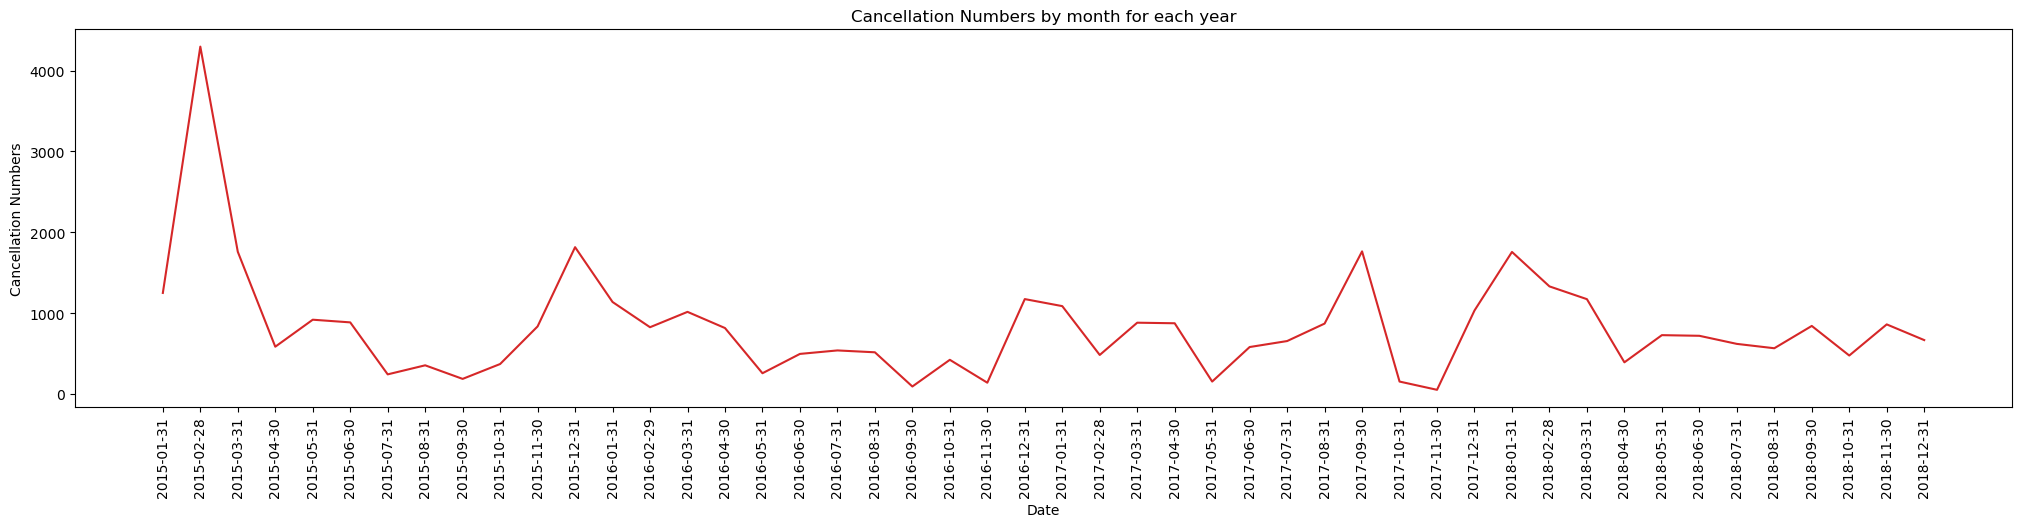

In [90]:
plt.figure(figsize=(25,5), dpi= 100)
plt.plot("Date","# Cancelled Flights",data=df, color='tab:red')
# Set a Title and labels
plt.title("Cancellation Numbers by month for each year")
plt.xlabel("Date")
plt.ylabel("Cancellation Numbers")
plt.xticks(df["Date"], rotation="vertical")
plt.show()

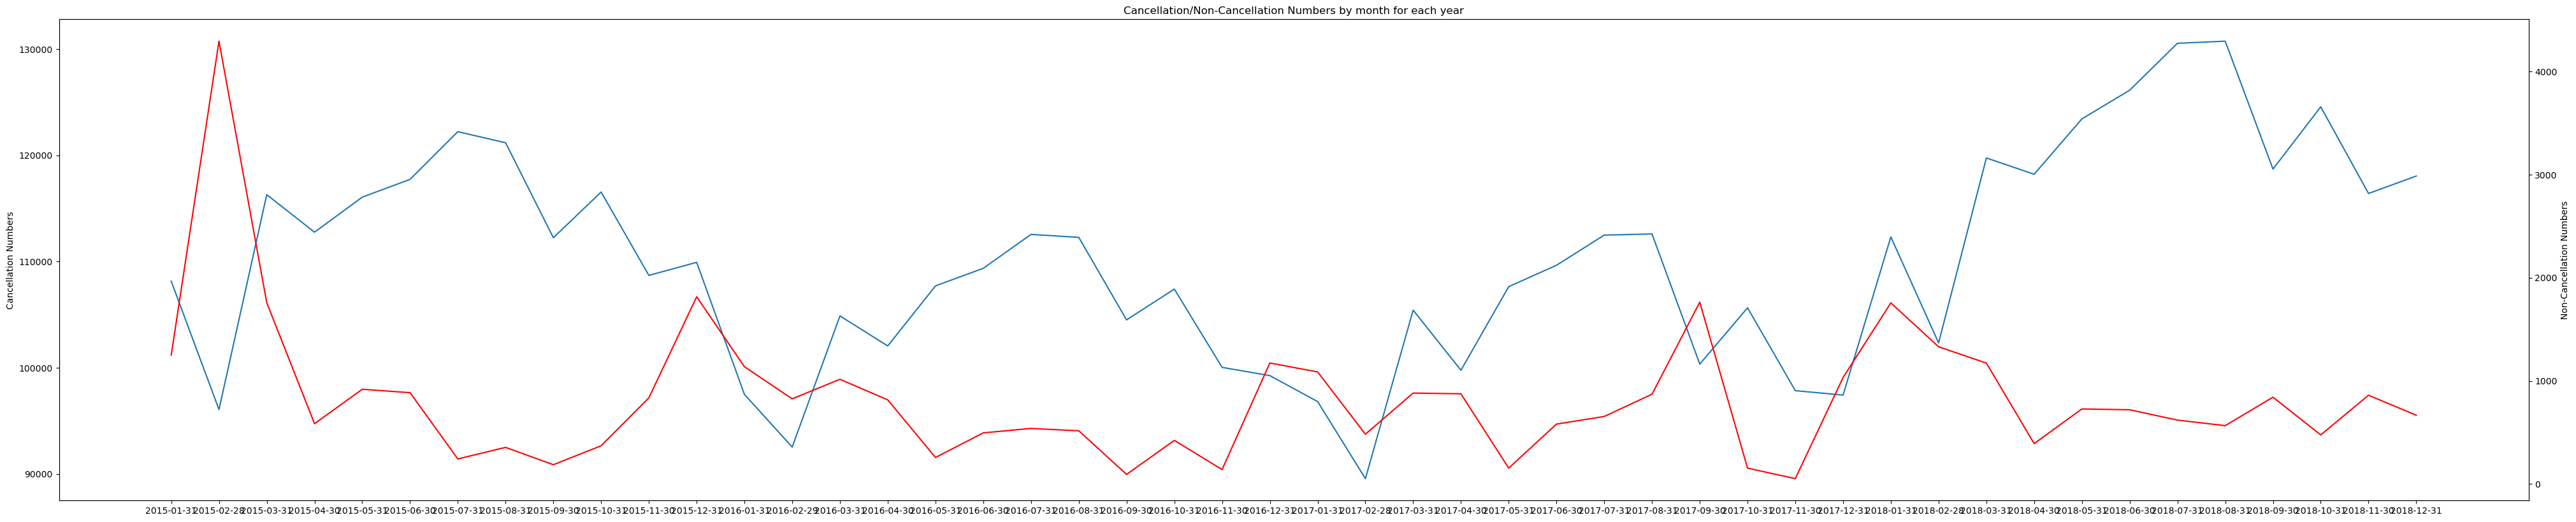

In [101]:
fig = plt.figure(figsize=(50,10), dpi= 100)
ax1=plt.subplot(1,1,1)
ax1.plot(df["Date"],df["# Non-Cancelled Flights"])
ax2=ax1.twinx()
ax2.plot(df["Date"],df["# Cancelled Flights"],color="r")
plt.xticks(df["Date"], rotation=45)
plt.title("Cancellation/Non-Cancellation Numbers by month for each year")
plt.xlabel("Date")
ax1.set_ylabel("Cancellation Numbers")
ax2.set_ylabel("Non-Cancellation Numbers")
plt.show()

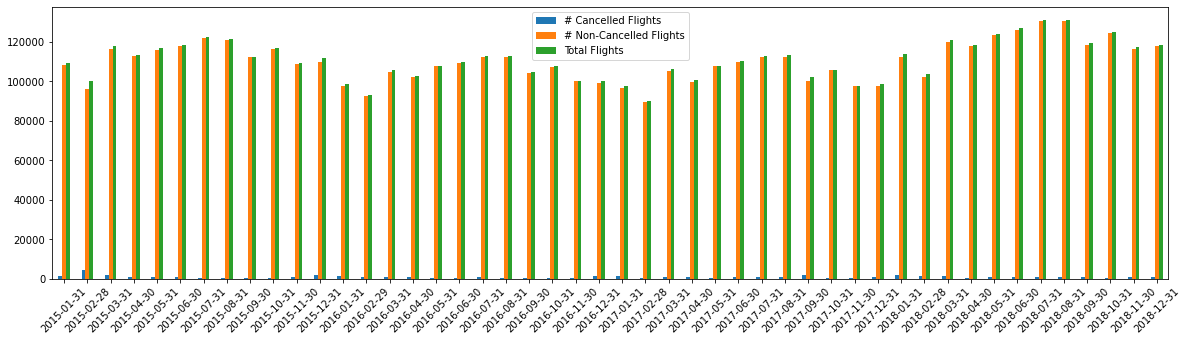

<Figure size 432x288 with 0 Axes>

In [45]:
multi_plot = df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(df["Date"], rotation=45)

plt.show()
plt.tight_layout()

In [77]:
precip_grp = cancelled.groupby("Precip Type")["Airport"].count()

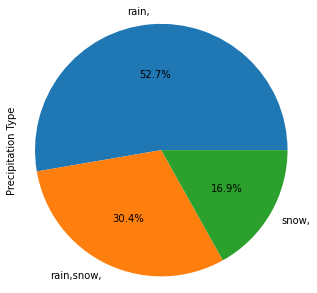

In [73]:
# Cencellations due to the precipitation type
precip_chart = precip_grp.plot(kind="pie",autopct ="%1.1f%%",figsize=(5,5))
precip_chart.set_ylabel("Precipitation Type")
plt.axis("equal")
plt.show()

In [98]:
airport_grp = cancelled.groupby("Airport")["Airport"].count()

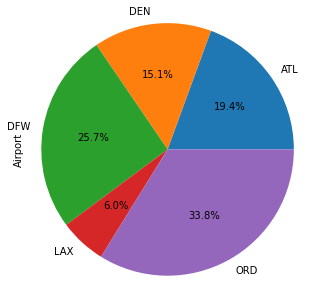

In [97]:
# cancellation numbers along airports
airport_chart = airport_grp.plot(kind="pie",autopct ="%1.1f%%",figsize=(5,5))
airport_chart.set_ylabel("Airport")
plt.axis("equal")
plt.show()

In [104]:
date_grp = cancelled.groupby("Year")["Year"].count()

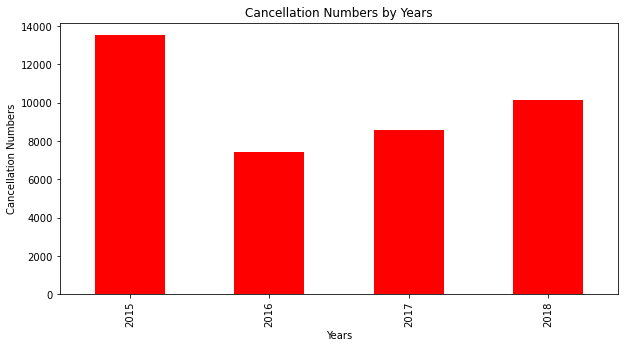

<Figure size 432x288 with 0 Axes>

In [105]:
# Cancellation Numbers by years
date_chart = date_grp.plot(kind="bar",color="r" ,figsize=(10,5))
plt.title("Cancellation Numbers by Years")
plt.xlabel("Years")
plt.ylabel("Cancellation Numbers")
plt.show()
plt.tight_layout()